In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# 欠損値の状況を確認
def cal_missing_rate(df, c):
    total = df[c].isnull().sum()
    percent = (total/len(df[c])*100)
    # return pd.DataFrame([[total, percent]], columns=['total', 'percent'], index=[c])
    return total, percent

# cal_missing_rate(df, 'pclass')
for i in df.columns:
    total, percent = cal_missing_rate(df, i)
    if percent >= 15: #何％以上の欠損を表示するか
        print('column:{0}, tatl:{1}, percent:{2}'.format(i, total, percent))


column:age, tatl:177, percent:19.865319865319865
column:deck, tatl:688, percent:77.21661054994388


In [21]:
df.describe() #欠損値は無視された上での統計処理であることに留意

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.describe(exclude='number')

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


<AxesSubplot:xlabel='fare'>

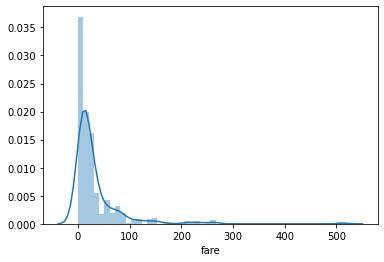

In [24]:
sns.distplot(df['fare'])

In [107]:
df_2 = sns.load_dataset('tips')
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill'>

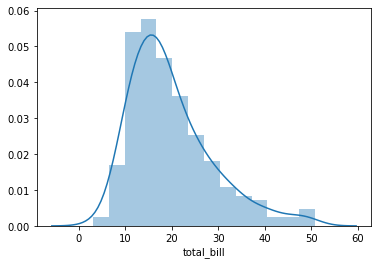

In [47]:
sns.distplot(df_2['total_bill'])

<AxesSubplot:xlabel='total_bill_level', ylabel='tip'>

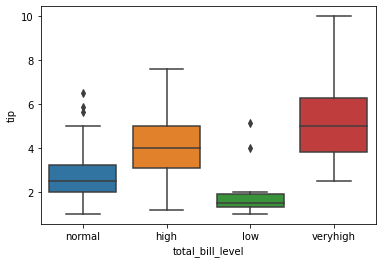

In [48]:
def convert_bill(i):
    a = 0
    if i < 10:
        a = 'low'
    elif 10 <= i < 25:
        a = 'normal'
    elif 25 <= i < 40:
        a = 'high'
    elif 40 <= i:
        a = 'veryhigh'
    return a
df_2['total_bill_level'] = df_2['total_bill'].apply(lambda x: convert_bill(x))
sns.boxplot(data=df_2, x='total_bill_level', y='tip')

<AxesSubplot:xlabel='age'>

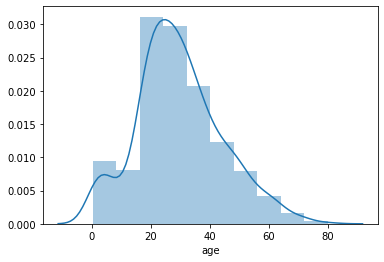

In [30]:
df_1 = df.dropna(subset=['age'])
sns.distplot(df_1['age'], bins=10)

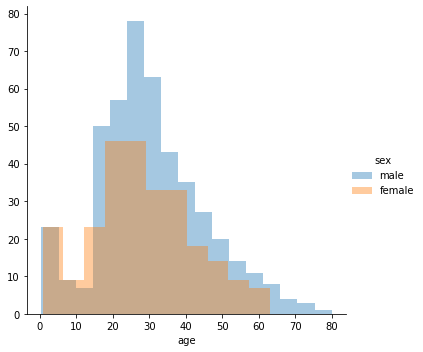

In [34]:
g = sns.FacetGrid(df_1, hue='sex', height=5)
g.map(sns.distplot, 'age', kde=False)
g.add_legend()

<AxesSubplot:xlabel='pclass', ylabel='fare'>

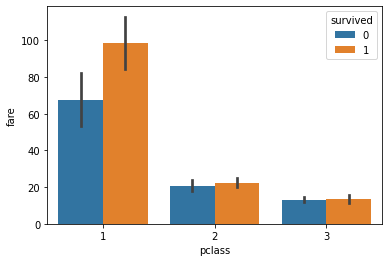

In [53]:
sns.barplot(data=df_1, x='pclass', y='fare', hue='survived')

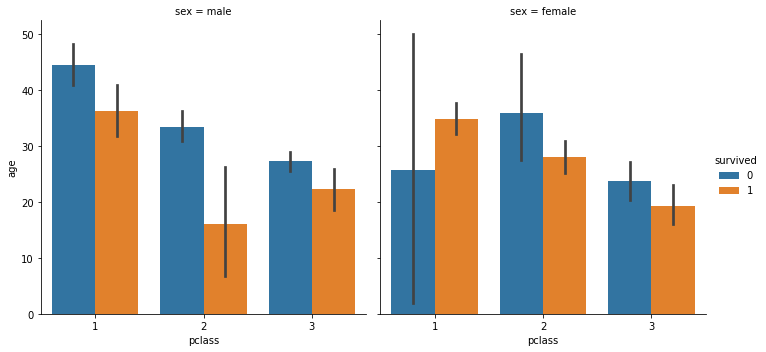

In [54]:
sns.catplot(data=df_1, kind='bar', x='pclass', y='age', hue='survived', col='sex')

<AxesSubplot:xlabel='pclass', ylabel='age'>

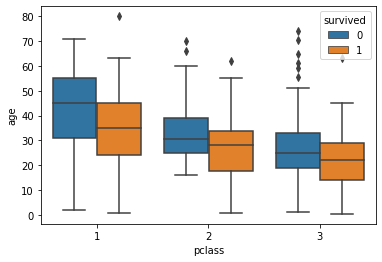

In [57]:
sns.boxplot(data=df_1, x='pclass', y='age', hue='survived')

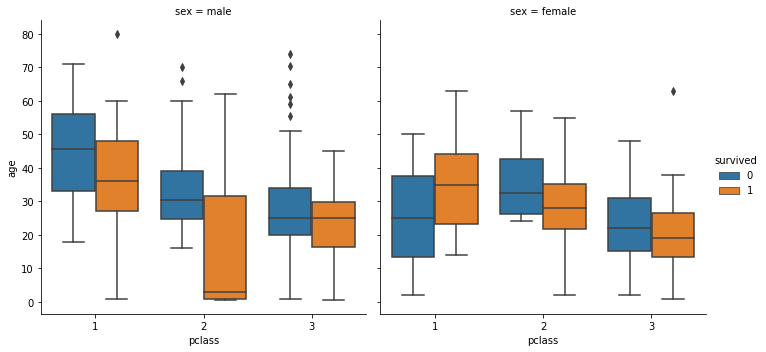

In [65]:
sns.catplot(data=df_1, kind='box', x='pclass', y='age', hue='survived', col='sex')

<AxesSubplot:xlabel='pclass', ylabel='age'>

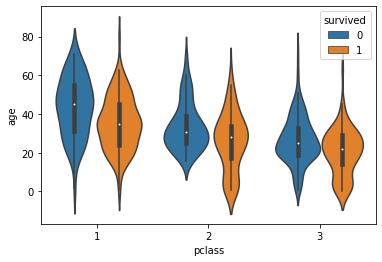

In [60]:
sns.violinplot(data=df_1, x='pclass', y='age', hue='survived')

<AxesSubplot:xlabel='pclass', ylabel='age'>

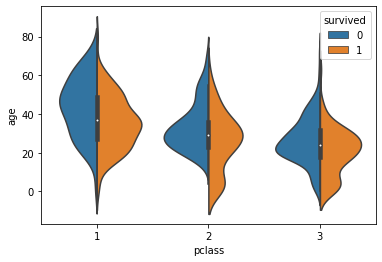

In [61]:
sns.violinplot(data=df_1, x='pclass', y='age', hue='survived', split=True)

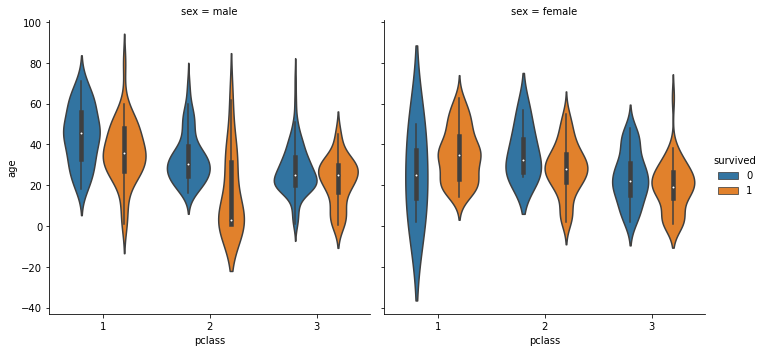

In [64]:
sns.catplot(data=df_1, kind='violin', x='pclass', y='age', hue='survived', col='sex')

In [68]:
df_3 = sns.load_dataset('flights')
df_3.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

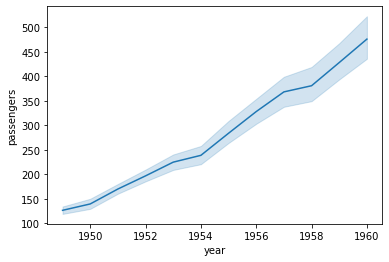

In [71]:
sns.lineplot(data=df_3, x='year', y='passengers')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

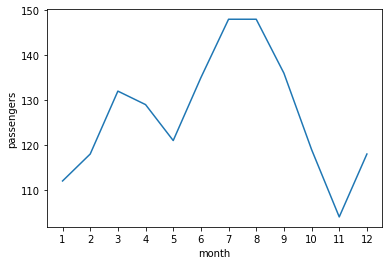

In [75]:
ax = sns.lineplot(data=df_3[df_3['year']==1949], x='month', y='passengers')
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

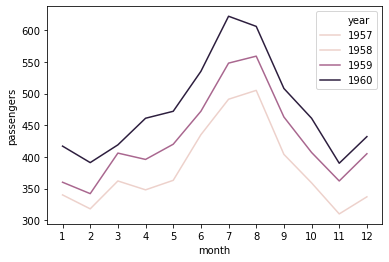

In [76]:
ax = sns.lineplot(data=df_3[df_3['year']>1957], x='month', y='passengers', hue='year')
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

In [87]:
# df_2.head()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   size              244 non-null    int64   
 7   total_bill_level  244 non-null    object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.2+ KB


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

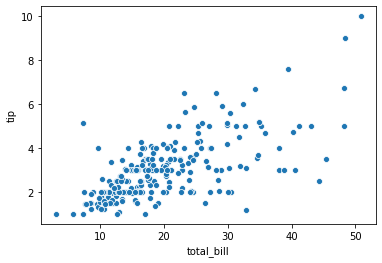

In [90]:
sns.scatterplot(data=df_2, x='total_bill', y='tip')

In [80]:
df_2.corr()['total_bill']['tip']

0.6757341092113642

In [96]:
# sns.scatterplot(data=df_2, x='total_bill', y='tip', hue='sex')

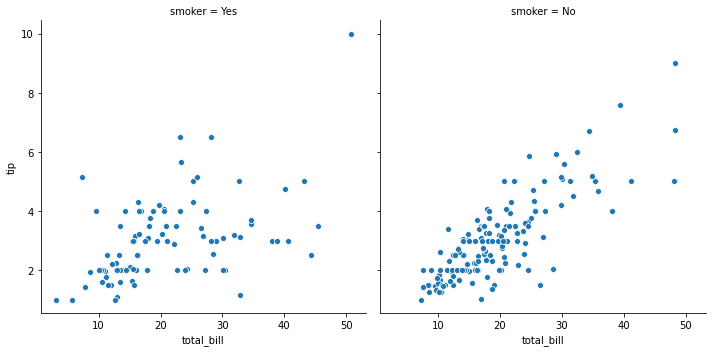

In [94]:
sns.relplot(data=df_2, kind='scatter', x='total_bill', y='tip', col='smoker')

In [97]:
df_2[df_2['smoker']=='No'].corr()['total_bill']['tip']

0.822182625705083

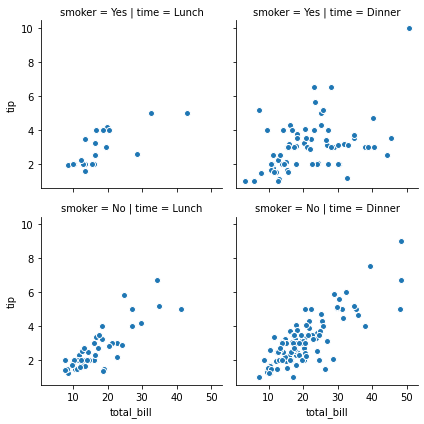

In [101]:
g = sns.FacetGrid(df_2, height=3, col='time', row='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

In [102]:
df_2[(df_2.smoker=='No')&(df_2.time=='Dinner')].corr()['total_bill']['tip']

0.8113730146004191

In [103]:
df_2[(df_2.smoker=='No')&(df_2.time=='Lunch')].corr()['total_bill']['tip']

0.8353820861469046

<AxesSubplot:>

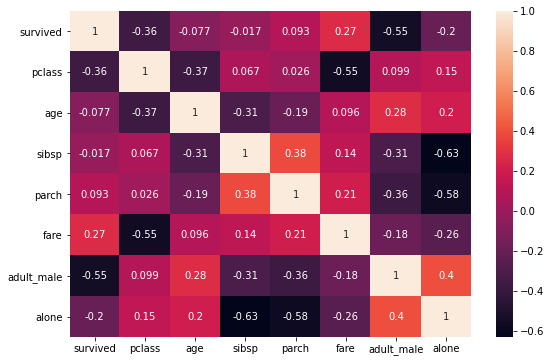

In [104]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_1.corr(), annot=True)

<AxesSubplot:>

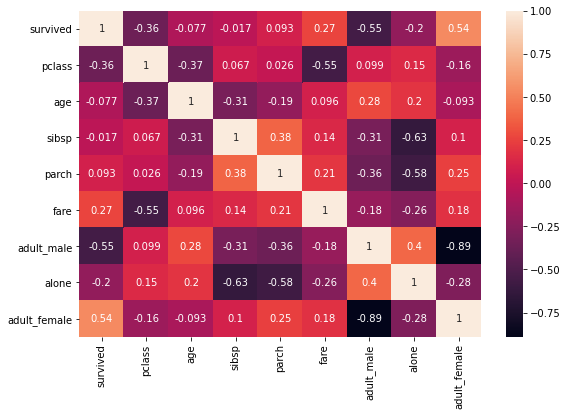

In [106]:
df_1['adult_female'] = df_1['sex'].apply(lambda x: True if x=='female' else False)
plt.figure(figsize=(9, 6))
sns.heatmap(df_1.corr(), annot=True)